# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
units = "imperial"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
temps = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [3]:
cities

['ostrovnoy',
 'bluff',
 'hilo',
 'port huron',
 'benguela',
 'hami',
 'mount gambier',
 'yellowknife',
 'albany',
 'kamenskoye',
 'bichura',
 'ushuaia',
 'ketchikan',
 'ponta do sol',
 'sao filipe',
 'bethel',
 'castro',
 'guerrero negro',
 'pangnirtung',
 'faanui',
 'rikitea',
 'tiksi',
 'khonuu',
 'abu samrah',
 'ribeira grande',
 'asau',
 'mataura',
 'porto novo',
 'ancud',
 'aripuana',
 'port alfred',
 'punta arenas',
 'avarua',
 'butaritari',
 'langub',
 'grand centre',
 'zlitan',
 'ballina',
 'kosovska mitrovica',
 'venustiano carranza',
 'tuktoyaktuk',
 'haines junction',
 'gondar',
 'cidreira',
 'basoko',
 'alofi',
 'ijaki',
 'pavilosta',
 'port blair',
 'atuona',
 'ngukurr',
 'houma',
 'provideniya',
 'san rafael',
 'pryazha',
 'arraial do cabo',
 'atbasar',
 'martaban',
 'saldanha',
 'asfi',
 'husavik',
 'majene',
 'gazanjyk',
 'bara',
 'coquimbo',
 'verkhnevilyuysk',
 'caravelas',
 'esperance',
 'dickinson',
 'kiama',
 'luderitz',
 'lata',
 'qasigiannguit',
 'iqaluit',
 'no

In [4]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + "ponta delgada"
response = requests.get(query_url).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 91},
 'cod': 200,
 'coord': {'lat': 37.73, 'lon': -25.67},
 'dt': 1579973217,
 'id': 3372783,
 'main': {'feels_like': 57.29,
          'humidity': 84,
          'pressure': 1020,
          'temp': 61,
          'temp_max': 61,
          'temp_min': 61},
 'name': 'Ponta Delgada',
 'rain': {'3h': 0.13},
 'sys': {'country': 'PT',
         'id': 2021322,
         'sunrise': 1579942332,
         'sunset': 1579978635,
         'type': 3},
 'timezone': -3600,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 243, 'gust': 15.99, 'speed': 10}}


In [6]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
counter = 1
for city in cities:
    query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    try:
        response = requests.get(query_url).json()
        temp = response['main']['temp']
        temps.append(temp)
        print(f'Processing Record {counter} of set 1| {city}')
        counter +=1
    except:
        print(f'City not found')
print('Data Retrieval is Complete')

Processing Record 1 of set 1| ostrovnoy
Processing Record 2 of set 1| bluff
Processing Record 3 of set 1| hilo
Processing Record 4 of set 1| port huron
Processing Record 5 of set 1| benguela
Processing Record 6 of set 1| hami
Processing Record 7 of set 1| mount gambier
Processing Record 8 of set 1| yellowknife
Processing Record 9 of set 1| albany
City not found
Processing Record 10 of set 1| bichura
Processing Record 11 of set 1| ushuaia
Processing Record 12 of set 1| ketchikan
Processing Record 13 of set 1| ponta do sol
Processing Record 14 of set 1| sao filipe
Processing Record 15 of set 1| bethel
Processing Record 16 of set 1| castro
Processing Record 17 of set 1| guerrero negro
Processing Record 18 of set 1| pangnirtung
Processing Record 19 of set 1| faanui
Processing Record 20 of set 1| rikitea
Processing Record 21 of set 1| tiksi
City not found
Processing Record 22 of set 1| abu samrah
Processing Record 23 of set 1| ribeira grande
Processing Record 24 of set 1| asau
Processing Re

Processing Record 192 of set 1| fortuna
Processing Record 193 of set 1| sorong
Processing Record 194 of set 1| shangrao
Processing Record 195 of set 1| bitung
Processing Record 196 of set 1| amga
Processing Record 197 of set 1| qax
Processing Record 198 of set 1| ilebo
Processing Record 199 of set 1| shurugwi
Processing Record 200 of set 1| kavieng
Processing Record 201 of set 1| belyy yar
Processing Record 202 of set 1| poum
Processing Record 203 of set 1| martapura
Processing Record 204 of set 1| baykalsk
Processing Record 205 of set 1| montijo
Processing Record 206 of set 1| kedrovyy
Processing Record 207 of set 1| padang
Processing Record 208 of set 1| torbay
Processing Record 209 of set 1| kieta
Processing Record 210 of set 1| cap malheureux
Processing Record 211 of set 1| cherskiy
City not found
Processing Record 212 of set 1| nelson bay
Processing Record 213 of set 1| vari
Processing Record 214 of set 1| ossora
Processing Record 215 of set 1| pella
Processing Record 216 of set 1

Processing Record 390 of set 1| samarai
Processing Record 391 of set 1| markova
Processing Record 392 of set 1| isangel
Processing Record 393 of set 1| saint george
Processing Record 394 of set 1| jalu
Processing Record 395 of set 1| alindao
Processing Record 396 of set 1| grants
Processing Record 397 of set 1| aquidaba
Processing Record 398 of set 1| bemidji
Processing Record 399 of set 1| ulladulla
Processing Record 400 of set 1| uusikaupunki
Processing Record 401 of set 1| tulum
Processing Record 402 of set 1| bethanien
Processing Record 403 of set 1| moose factory
Processing Record 404 of set 1| joao pinheiro
Processing Record 405 of set 1| stepnyak
Processing Record 406 of set 1| nanyang
Processing Record 407 of set 1| leningradskiy
Processing Record 408 of set 1| poyarkovo
Processing Record 409 of set 1| mehamn
Processing Record 410 of set 1| krasnorechenskiy
City not found
Processing Record 411 of set 1| clyde river
Processing Record 412 of set 1| honningsvag
Processing Record 4

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#city_weather = []
city_weather_pd = pd.DataFrame(cities)
city_weather_pd["Cloudiness"] = ""
city_weather_pd["Country"] = ""
city_weather_pd["Date"] = ""
city_weather_pd["Humidity"] = ""
city_weather_pd["Lat"] = ""
city_weather_pd["Lng"] = ""
city_weather_pd["Max Temp"] = ""
city_weather_pd["Wind Speed"] = ""

city_weather_pd = city_weather_pd.rename(columns={(0):('City')})
city_weather_pd

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ostrovnoy,,,,,,,,
1,bluff,,,,,,,,
2,hilo,,,,,,,,
3,port huron,,,,,,,,
4,benguela,,,,,,,,
...,...,...,...,...,...,...,...,...,...
608,freital,,,,,,,,
609,samusu,,,,,,,,
610,pingliang,,,,,,,,
611,lohardaga,,,,,,,,


In [8]:
City_Weather = pd.DataFrame

In [9]:
index=0
for city in cities:
    query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    try:
        response = requests.get(query_url).json()
        city_weather_pd.loc[index,"Cloudiness"] = response['clouds']['all']
        city_weather_pd.loc[index,"Country"] = response['sys']['country']
        city_weather_pd.loc[index,"Date"] = response['dt']
        city_weather_pd.loc[index,"Humidity"] = response['main']['humidity']
        city_weather_pd.loc[index,"Lat"] = response['coord']['lat']
        city_weather_pd.loc[index,"Lng"] = response['coord']['lon']
        city_weather_pd.loc[index,"Max Temp"] = response['main']['temp_max']
        city_weather_pd.loc[index,"Wind Speed"] = response['wind']['speed']
        index +=1
    except:
        index +=1
        print(f'did not find city{index}')


did not find city10
did not find city23
did not find city36
did not find city47
did not find city51
did not find city81
did not find city83
did not find city86
did not find city89
did not find city94
did not find city101
did not find city103
did not find city107
did not find city120
did not find city138
did not find city151
did not find city153
did not find city171
did not find city174
did not find city186
did not find city188
did not find city189
did not find city211
did not find city212
did not find city215
did not find city217
did not find city238
did not find city255
did not find city258
did not find city264
did not find city271
did not find city297
did not find city313
did not find city324
did not find city361
did not find city371
did not find city374
did not find city382
did not find city419
did not find city427
did not find city451
did not find city461
did not find city462
did not find city465
did not find city469
did not find city481
did not find city483
did not find city514
di

In [10]:
#city_weather_pd["Lat"] = Lat.convert_objects(convert_numeric=True)
city_weather_pd = city_weather_pd.dropna(how='all')
city_weather_pd = pd.DataFrame(city_weather_pd)
city_weather_pd


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ostrovnoy,66,RU,1580159275,80,68.05,39.51,8.8,6.35
1,bluff,19,NZ,1580159049,73,-46.6,168.33,61,5.01
2,hilo,90,US,1580159194,65,19.73,-155.09,78.01,3.36
3,port huron,90,US,1580159276,80,42.97,-82.42,36,6.93
4,benguela,98,AO,1580159276,78,-12.58,13.41,79.54,3.31
...,...,...,...,...,...,...,...,...,...
608,freital,75,DE,1580159367,80,51,13.65,43,14.99
609,samusu,,,,,,,,
610,pingliang,0,CN,1580159367,79,35.54,106.69,19.71,2.19
611,lohardaga,0,IN,1580159164,67,23.43,84.68,57.2,2.42


In [11]:
city_weather_pd.to_csv('city_weather.csv')

In [12]:
city_weather_df = pd.read_csv('city_weather.csv')
city_weather_df.dropna(how='all')
city_weather_df.head()

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,66.0,RU,1.580159e+09,80.0,68.05,39.51,8.80,6.35
1,1,bluff,19.0,NZ,1.580159e+09,73.0,-46.60,168.33,61.00,5.01
2,2,hilo,90.0,US,1.580159e+09,65.0,19.73,-155.09,78.01,3.36
3,3,port huron,90.0,US,1.580159e+09,80.0,42.97,-82.42,36.00,6.93
4,4,benguela,98.0,AO,1.580159e+09,78.0,-12.58,13.41,79.54,3.31


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

([<matplotlib.axis.YTick at 0x2ac8716e248>,
 <a list of 7 Text yticklabel objects>)

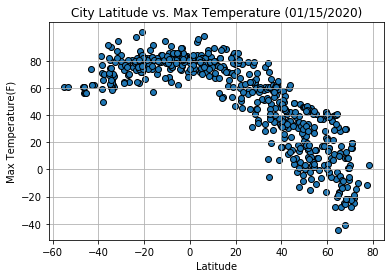

In [13]:
x_Lat = city_weather_df['Lat']
y_Temp = city_weather_df['Max Temp']
plt.scatter(x_Lat,y_Temp,marker = 'o',edgecolors = 'black')
plt.title("City Latitude vs. Max Temperature (01/15/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid()
plt.yticks(np.arange(-40,100,20))

([<matplotlib.axis.YTick at 0x1f964471448>,
 <a list of 6 Text yticklabel objects>)

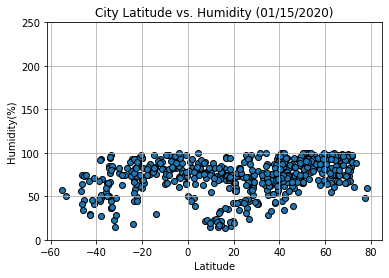

In [13]:
x_Lat = city_weather_df['Lat']
y_Humidity = city_weather_df['Humidity']
plt.scatter(x_Lat,y_Humidity,marker = 'o',edgecolors = 'black')
plt.title("City Latitude vs. Humidity (01/15/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()
plt.yticks(np.arange(0,300,50))

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

([<matplotlib.axis.YTick at 0x1f9644e2a48>,
 <a list of 5 Text yticklabel objects>)

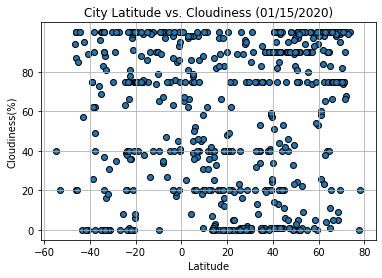

In [14]:
x_Lat = city_weather_df['Lat']
y_Cloudiness = city_weather_df['Cloudiness']
plt.scatter(x_Lat,y_Cloudiness,marker = 'o',edgecolors = 'black')
plt.title("City Latitude vs. Cloudiness (01/15/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()
plt.yticks(np.arange(0,100,20))

#### Latitude vs. Wind Speed Plot

([<matplotlib.axis.YTick at 0x20a3f2971c8>,
 <a list of 5 Text yticklabel objects>)

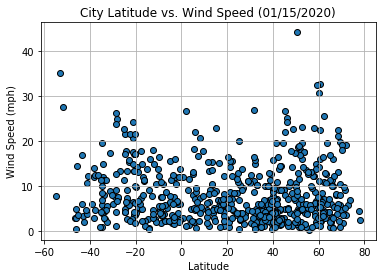

In [13]:
x_Lat = city_weather_df['Lat']
y_windspeed = city_weather_df['Wind Speed']
plt.scatter(x_Lat,y_windspeed,marker = 'o',edgecolors = 'black')
plt.title("City Latitude vs. Wind Speed (01/15/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.yticks(np.arange(0,50,10))

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def mylinreg(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue}")
    
    
def mylinregs(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(-50,70),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue}")
    

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_city_weather_df = city_weather_df.loc[city_weather_df['Lat']>0]
southern_city_weather_df = city_weather_df.loc[city_weather_df['Lat']<0]
southern_city_weather_df


,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,1,bluff,19.0,NZ,1.580159e+09,73.0,-46.60,168.33,61.00,5.01
4,4,benguela,98.0,AO,1.580159e+09,78.0,-12.58,13.41,79.54,3.31
6,6,mount gambier,100.0,AU,1.580159e+09,93.0,-37.83,140.77,50.00,1.12
11,11,ushuaia,75.0,AR,1.580159e+09,54.0,-54.80,-68.30,60.80,13.87
16,16,castro,92.0,BR,1.580159e+09,70.0,-24.79,-50.01,75.65,5.70
...,...,...,...,...,...,...,...,...,...,...
590,590,rio grande,75.0,BR,1.580159e+09,54.0,-32.03,-52.10,82.40,14.99
592,592,rio novo do sul,100.0,BR,1.580159e+09,93.0,-20.86,-40.94,76.55,6.38
596,596,walvis bay,0.0,NaN,1.580159e+09,82.0,-22.96,14.51,64.40,8.05
602,602,cilegon,20.0,ID,1.580159e+09,88.0,-6.02,106.05,78.80,3.36


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8662830535560783


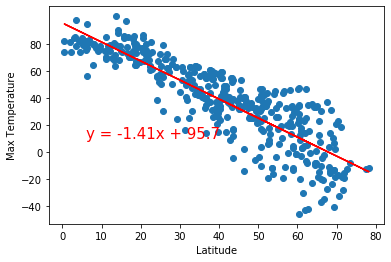

In [16]:
x_nLat = northern_city_weather_df['Lat']
y_nTemp = northern_city_weather_df['Max Temp']
plt.scatter(x_nLat,y_nTemp)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.yticks(np.arange(-40,100,20))
mylinreg(x_nLat,y_nTemp)


In [31]:
x_nLat

3      66.83
4      35.13
8      67.45
11     13.22
12     41.37
       ...  
598    40.60
599    40.37
601    39.36
602     5.56
603     6.99
Name: Lat, Length: 392, dtype: float64

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.46087001817743684


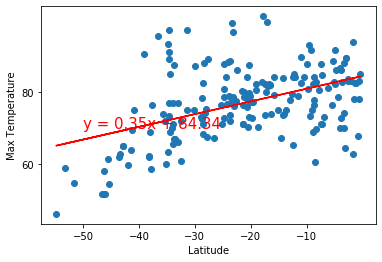

In [20]:
x_sLat = southern_city_weather_df['Lat']
y_sTemp = southern_city_weather_df['Max Temp']
plt.scatter(x_sLat,y_sTemp)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.yticks(np.arange(-40,100,20))
plt.xticks(np.arange(-50,0,10))
mylinregs(x_sLat,y_sTemp)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.39172758474472835


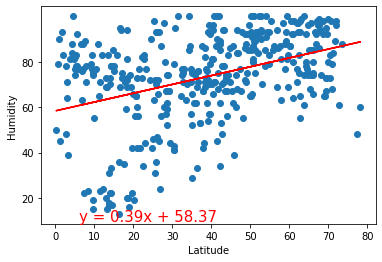

In [20]:
x_nLat = northern_city_weather_df['Lat']
y_nTemp = northern_city_weather_df['Humidity']
plt.scatter(x_nLat,y_nTemp)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.yticks(np.arange(-40,100,20))
mylinreg(x_nLat,y_nTemp)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.45519302992662636


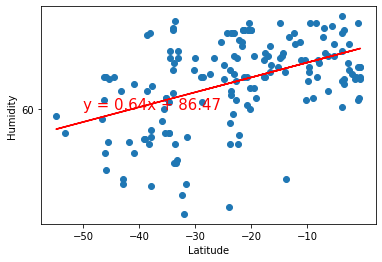

In [21]:
x_sLat = southern_city_weather_df['Lat']
y_sHumidity = southern_city_weather_df['Humidity']
plt.scatter(x_sLat,y_sHumidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.yticks(np.arange(-40,300,50))
plt.xticks(np.arange(-50,0,10))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_sLat, y_sHumidity)
regress_values = x_sLat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_sLat,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.26531005224110216


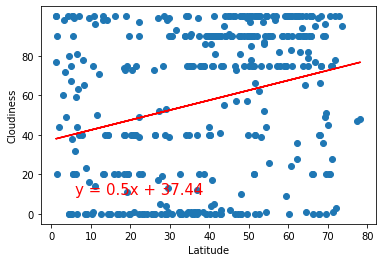

In [16]:
x_nLat = northern_city_weather_df['Lat']
y_nCloudiness = northern_city_weather_df['Cloudiness']
plt.scatter(x_nLat,y_nCloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.yticks(np.arange(0,100,20))
mylinreg(x_nLat,y_nCloudiness)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12695884395006504


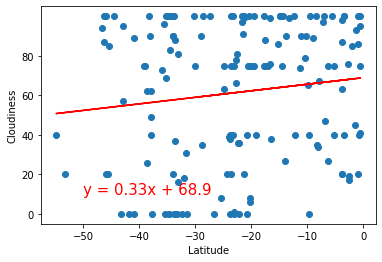

In [23]:
x_sLat = southern_city_weather_df['Lat']
y_sCloudiness = southern_city_weather_df['Cloudiness']
plt.scatter(x_sLat,y_sCloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.yticks(np.arange(0,100,20))
mylinregs(x_sLat,y_sCloudiness)

The r-squared is: 0.06631664299445177


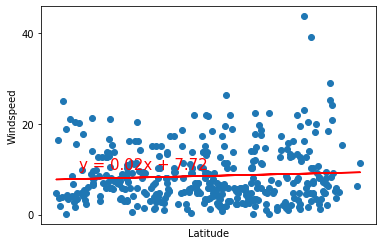

In [24]:
x_nLat = northern_city_weather_df['Lat']
y_nWindspeed = northern_city_weather_df['Wind Speed']
plt.scatter(x_nLat,y_nWindspeed)
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.yticks(np.arange(0,100,20))
plt.xticks(np.arange(-50,0,10))
mylinreg(x_nLat,y_nWindspeed)

The r-squared is: 0.06631664299445177


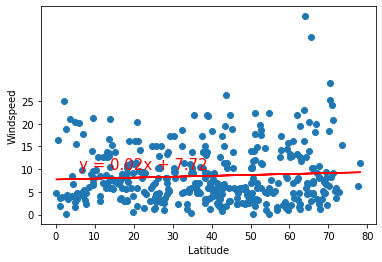

In [25]:
x_nLat = northern_city_weather_df['Lat']
y_nWindspeed = northern_city_weather_df['Wind Speed']
plt.scatter(x_nLat,y_nWindspeed)
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.yticks(np.arange(0,30,5))
mylinreg(x_nLat,y_nWindspeed)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2148243464828315


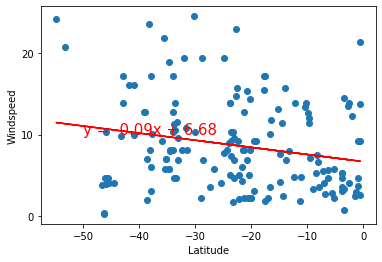

In [26]:
x_sLat = southern_city_weather_df['Lat']
y_sWindspeed = southern_city_weather_df['Wind Speed']
plt.scatter(x_sLat,y_sWindspeed)
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.yticks(np.arange(0,60,10))
mylinregs(x_sLat,y_sWindspeed)